## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Reading pre-processed data
df = pd.read_csv('./df_desc.cv')

In [3]:
df.columns

Index(['LineRef', 'BlockRef', 'Day', 'VehicleJourneyRef',
       'DestinationAimedArrivalTime', 'JourneyCode', 'FromStopID',
       'FromStopLocation', 'ToStopID', 'ToStopLocation', 'AimedDepartureTime',
       'AimedArrivalTime', 'ActualDepartureTime', 'ActualArrivalTime',
       'RouteID', 'ActualDepartureDateTime', 'ActualArrivalDateTime',
       'DepartureDate', 'ArrivalDate', 'TravelTime', 'TravelTimeInSeconds',
       'ArrivalDifference', 'DepartureDifference', 'HourOfDay', 'DayOfWeek',
       'ArrivalHour'],
      dtype='object')

In [4]:
df['ArrivalDate'].unique()

array(['2024-08-21', '2024-08-22', '2024-08-23', '2024-08-27',
       '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-01',
       '2024-09-02', '2024-08-31', '2024-08-24'], dtype=object)

## Train-test split
- Data is time series, we take a future set instead of random split
- dates between 2024-08-21  to 2024-08-28  as the train data and the data between 2024-08-27 to -2024-08-04 as test data

In [5]:
# Convert 'ActualArrivalTime' to datetime 
df['ActualArrivalTime'] = pd.to_datetime(df['ActualArrivalTime'])

# Define date ranges for training and test sets
train_start_date = '2024-08-21'
train_end_date = '2024-08-28'

test_start_date = '2024-08-29'
test_end_date = '2024-09-04'

# Create the train set by filtering the date range
train_data = df[(df['ArrivalDate'] >= train_start_date) & (df['ArrivalDate'] < train_end_date)]

# Create the test set by filtering the date range
test_data = df[(df['ArrivalDate'] >= test_start_date) & (df['ArrivalDate'] < test_end_date)]

# Display the first few rows of each set to verify
print("Train Data:")
print(train_data.head())
print(train_data.shape)

print("\nTest Data:")
print(test_data.head())
print(test_data.shape)


Train Data:
  LineRef  BlockRef        Day  \
0     NT1    1001.0  Wednesday   
1     NT1    1001.0  Wednesday   
2     NT1    1001.0  Wednesday   
3     NT1    1001.0  Wednesday   
4     NT1    1001.0  Wednesday   

                                   VehicleJourneyRef  \
0  NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...   
1  NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...   
2  NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...   
3  NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...   
4  NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...   

  DestinationAimedArrivalTime  JourneyCode FromStopID  \
0                    06:37:00       1021.0  260007454   
1                    06:37:00       1021.0  260007423   
2                    08:57:00       1053.0  260007454   
3                    08:57:00       1053.0  260007423   
4                    11:15:00       1081.0  260007454   

                                   FromStopLocation   ToStopID  \
0  (np.float64(-1.2052472), np.float6

In [6]:
#saving training and testing data to csv for fetching later. 
train_data.to_csv('./train_data.csv', index =False)
test_data.to_csv('./test_data.csv', index =False)

In [7]:
df= train_data
df.columns

Index(['LineRef', 'BlockRef', 'Day', 'VehicleJourneyRef',
       'DestinationAimedArrivalTime', 'JourneyCode', 'FromStopID',
       'FromStopLocation', 'ToStopID', 'ToStopLocation', 'AimedDepartureTime',
       'AimedArrivalTime', 'ActualDepartureTime', 'ActualArrivalTime',
       'RouteID', 'ActualDepartureDateTime', 'ActualArrivalDateTime',
       'DepartureDate', 'ArrivalDate', 'TravelTime', 'TravelTimeInSeconds',
       'ArrivalDifference', 'DepartureDifference', 'HourOfDay', 'DayOfWeek',
       'ArrivalHour'],
      dtype='object')

In [8]:
df.head()

,LineRef,BlockRef,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,FromStopLocation,ToStopID,ToStopLocation,...,ActualArrivalDateTime,DepartureDate,ArrivalDate,TravelTime,TravelTimeInSeconds,ArrivalDifference,DepartureDifference,HourOfDay,DayOfWeek,ArrivalHour
0,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",...,2024-08-21 06:35:51+01:00,2024-08-21,2024-08-21,9.30,558.0,-0.150000,-9.450000,6,Wednesday,6
1,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007423,"(-1.202979, 52.7731152)",260007343,"(-1.1997359, 52.7754058)",...,2024-08-21 06:37:42+01:00,2024-08-21,2024-08-21,1.85,111.0,0.700000,-0.150000,6,Wednesday,6
2,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",...,2024-08-21 08:57:05+01:00,2024-08-21,2024-08-21,5.40,324.0,1.083333,-4.316667,8,Wednesday,8
3,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007423,"(-1.202979, 52.7731152)",260007343,"(-1.1997359, 52.7754058)",...,2024-08-21 08:59:23+01:00,2024-08-21,2024-08-21,2.30,138.0,2.383333,1.083333,8,Wednesday,8
4,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",...,2024-08-21 11:06:27+01:00,2024-08-21,2024-08-21,0.00,0.0,-7.550000,-7.550000,11,Wednesday,11


In [9]:
#dropping columns used for identification and avoid repetitions
df = df.drop(['LineRef', 'BlockRef', 'FromStopLocation','ToStopLocation', 'ActualArrivalDateTime','ActualDepartureDateTime', 'DepartureDate','DayOfWeek',
       'ArrivalDate', 'TravelTimeInSeconds'], axis =1 )

In [10]:
df.columns

Index(['Day', 'VehicleJourneyRef', 'DestinationAimedArrivalTime',
       'JourneyCode', 'FromStopID', 'ToStopID', 'AimedDepartureTime',
       'AimedArrivalTime', 'ActualDepartureTime', 'ActualArrivalTime',
       'RouteID', 'TravelTime', 'ArrivalDifference', 'DepartureDifference',
       'HourOfDay', 'ArrivalHour'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1771 entries, 0 to 2840
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Day                          1771 non-null   object        
 1   VehicleJourneyRef            1771 non-null   object        
 2   DestinationAimedArrivalTime  1771 non-null   object        
 3   JourneyCode                  1771 non-null   float64       
 4   FromStopID                   1771 non-null   object        
 5   ToStopID                     1771 non-null   object        
 6   AimedDepartureTime           1771 non-null   object        
 7   AimedArrivalTime             1771 non-null   object        
 8   ActualDepartureTime          1771 non-null   object        
 9   ActualArrivalTime            1771 non-null   datetime64[ns]
 10  RouteID                      1771 non-null   object        
 11  TravelTime                   1771 non-null   flo

In [12]:
df.describe()

,JourneyCode,ActualArrivalTime,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour
count,1771.000000,1771,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000
mean,1099.533597,2024-08-23 00:42:37.926030592,1.262620,-293.625212,-293.850565,5.443252,5.443252
min,1005.000000,2024-08-21 06:35:51,0.000000,-1106.150000,-1100.150000,0.000000,0.000000
25%,1033.000000,2024-08-22 00:15:34,0.000000,-514.741667,-514.466667,0.000000,0.000000
50%,1082.000000,2024-08-22 16:44:29,0.583333,-0.483333,-3.200000,0.000000,0.000000
75%,1142.000000,2024-08-23 00:26:30,1.683333,1.400000,0.883333,11.000000,11.000000
max,2029.000000,2024-08-27 18:28:14,23.383333,1434.016667,1434.016667,23.000000,23.000000
std,118.293150,NaN,2.132418,388.946458,388.208693,6.231914,6.231914


In [13]:
df.describe(include=[object])

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,RouteID
count,1771,1771,1771,1771,1771,1771,1771,1771,1771
unique,5,172,64,111,111,1249,1344,775,380
top,Wednesday,NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024...,23:30:00,3390C2,3390S2,2024-08-22 00:23:51,2024-08-22 00:24:51,2024-08-22 00:23:51,1:1_2_2147483283
freq,759,472,936,95,95,32,22,231,87


In [14]:
df.describe(include=[object])

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,RouteID
count,1771,1771,1771,1771,1771,1771,1771,1771,1771
unique,5,172,64,111,111,1249,1344,775,380
top,Wednesday,NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024...,23:30:00,3390C2,3390S2,2024-08-22 00:23:51,2024-08-22 00:24:51,2024-08-22 00:23:51,1:1_2_2147483283
freq,759,472,936,95,95,32,22,231,87


In [15]:
# obtaining features 

df_features = ['TravelTime', 'ArrivalDifference', 'DepartureDifference', 'HourOfDay']

features  = df[df_features]

## Timeseries plot of features

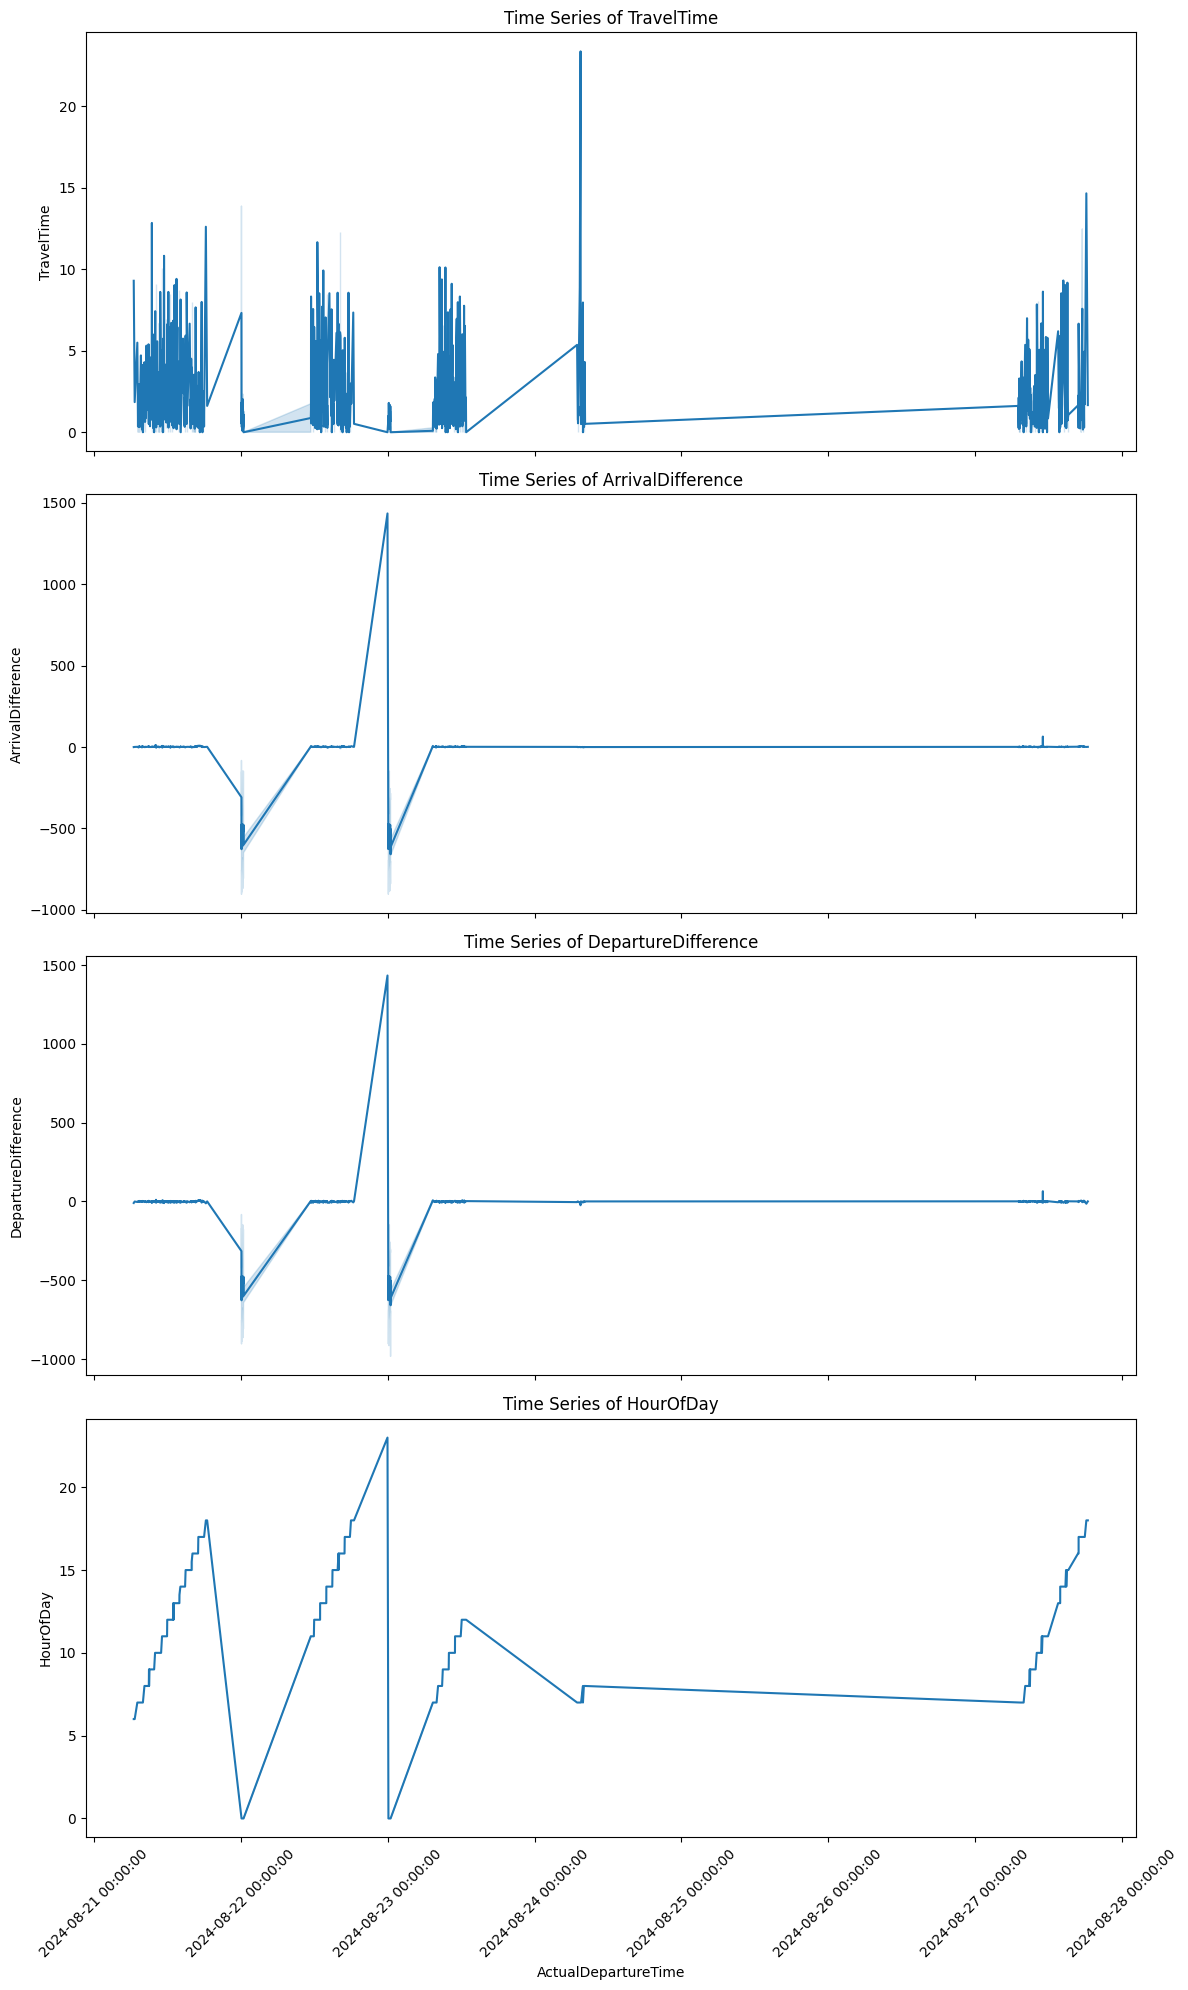

In [16]:
# ensuring time columns are in datetime format
import matplotlib.dates as mdates

df['ActualDepartureTime'] = pd.to_datetime(df['ActualDepartureTime'])
df['ActualArrivalTime'] = pd.to_datetime(df['ActualArrivalTime'])

# function to plot time series data
def linePlots(data, time_column, features, hue=None):
    # figure and axis
    fig, axs = plt.subplots(len(features), 1, figsize=(12, len(features)*5), sharex=True)
    
    # Flatten axs for feature
    if len(features) == 1:
        axs = [axs]
    
    for col, ax in zip(features, axs):
        sns.lineplot(x=time_column, y=col, ax=ax, data=data, hue=hue)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=15))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        ax.set_title(f'Time Series of {col}')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()
    
    # List of features to plot
features_to_plot = ['TravelTime', 'ArrivalDifference', 'DepartureDifference', 'HourOfDay']

# Call the plotting function
linePlots(data=df, time_column='ActualDepartureTime', features=features_to_plot, hue=None)

In [17]:
df.head()

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour
0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007454,260007423,2024-08-21 06:36:00,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,1:1_1_2147483284,9.30,-0.150000,-9.450000,6,6
1,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007423,260007343,2024-08-21 06:36:00,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1:1_2_2147483283,1.85,0.700000,-0.150000,6,6
2,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007454,260007423,2024-08-21 08:56:00,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,1:1_1_2147483284,5.40,1.083333,-4.316667,8,8
3,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007423,260007343,2024-08-21 08:56:00,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,1:1_2_2147483283,2.30,2.383333,1.083333,8,8
4,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,260007454,260007423,2024-08-21 11:14:00,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,1:1_1_2147483284,0.00,-7.550000,-7.550000,11,11


## Correlation of plot between time features

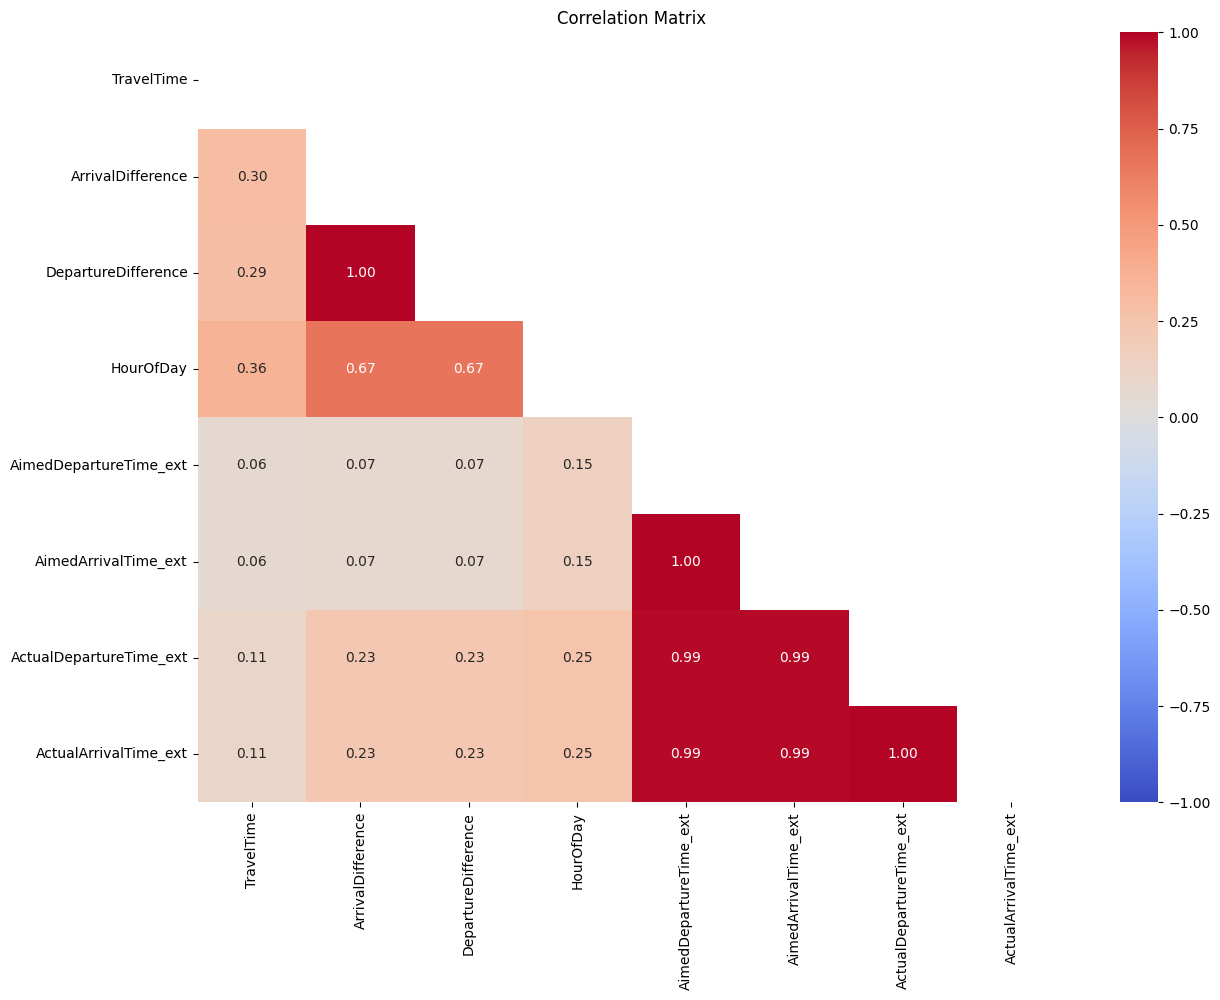

In [18]:
# Creating a new extract of the time feature for processing and convert datetime columns to numeric features (Unix timestamps)
df['AimedDepartureTime_ext'] = pd.to_datetime(df['AimedDepartureTime']).astype(int) / 10**9  # Unix timestamp
df['AimedArrivalTime_ext'] = pd.to_datetime(df['AimedArrivalTime']).astype(int) / 10**9  # Unix timestamp
df['ActualDepartureTime_ext'] = pd.to_datetime(df['ActualDepartureTime']).astype(int) / 10**9  # Unix timestamp
df['ActualArrivalTime_ext'] = pd.to_datetime(df['ActualArrivalTime']).astype(int) / 10**9  # Unix timestamp

# Define numeric features
numeric_features = [
    'TravelTime', 'ArrivalDifference', 'DepartureDifference',
    'HourOfDay', 'AimedDepartureTime_ext', 'AimedArrivalTime_ext',
    'ActualDepartureTime_ext', 'ActualArrivalTime_ext'
]

# Calculate the correlation matrix for the numeric features
corrMat = df[numeric_features].corr()

# mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corrMat, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corrMat, vmin=-1, vmax=1, annot=True, mask=mask, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



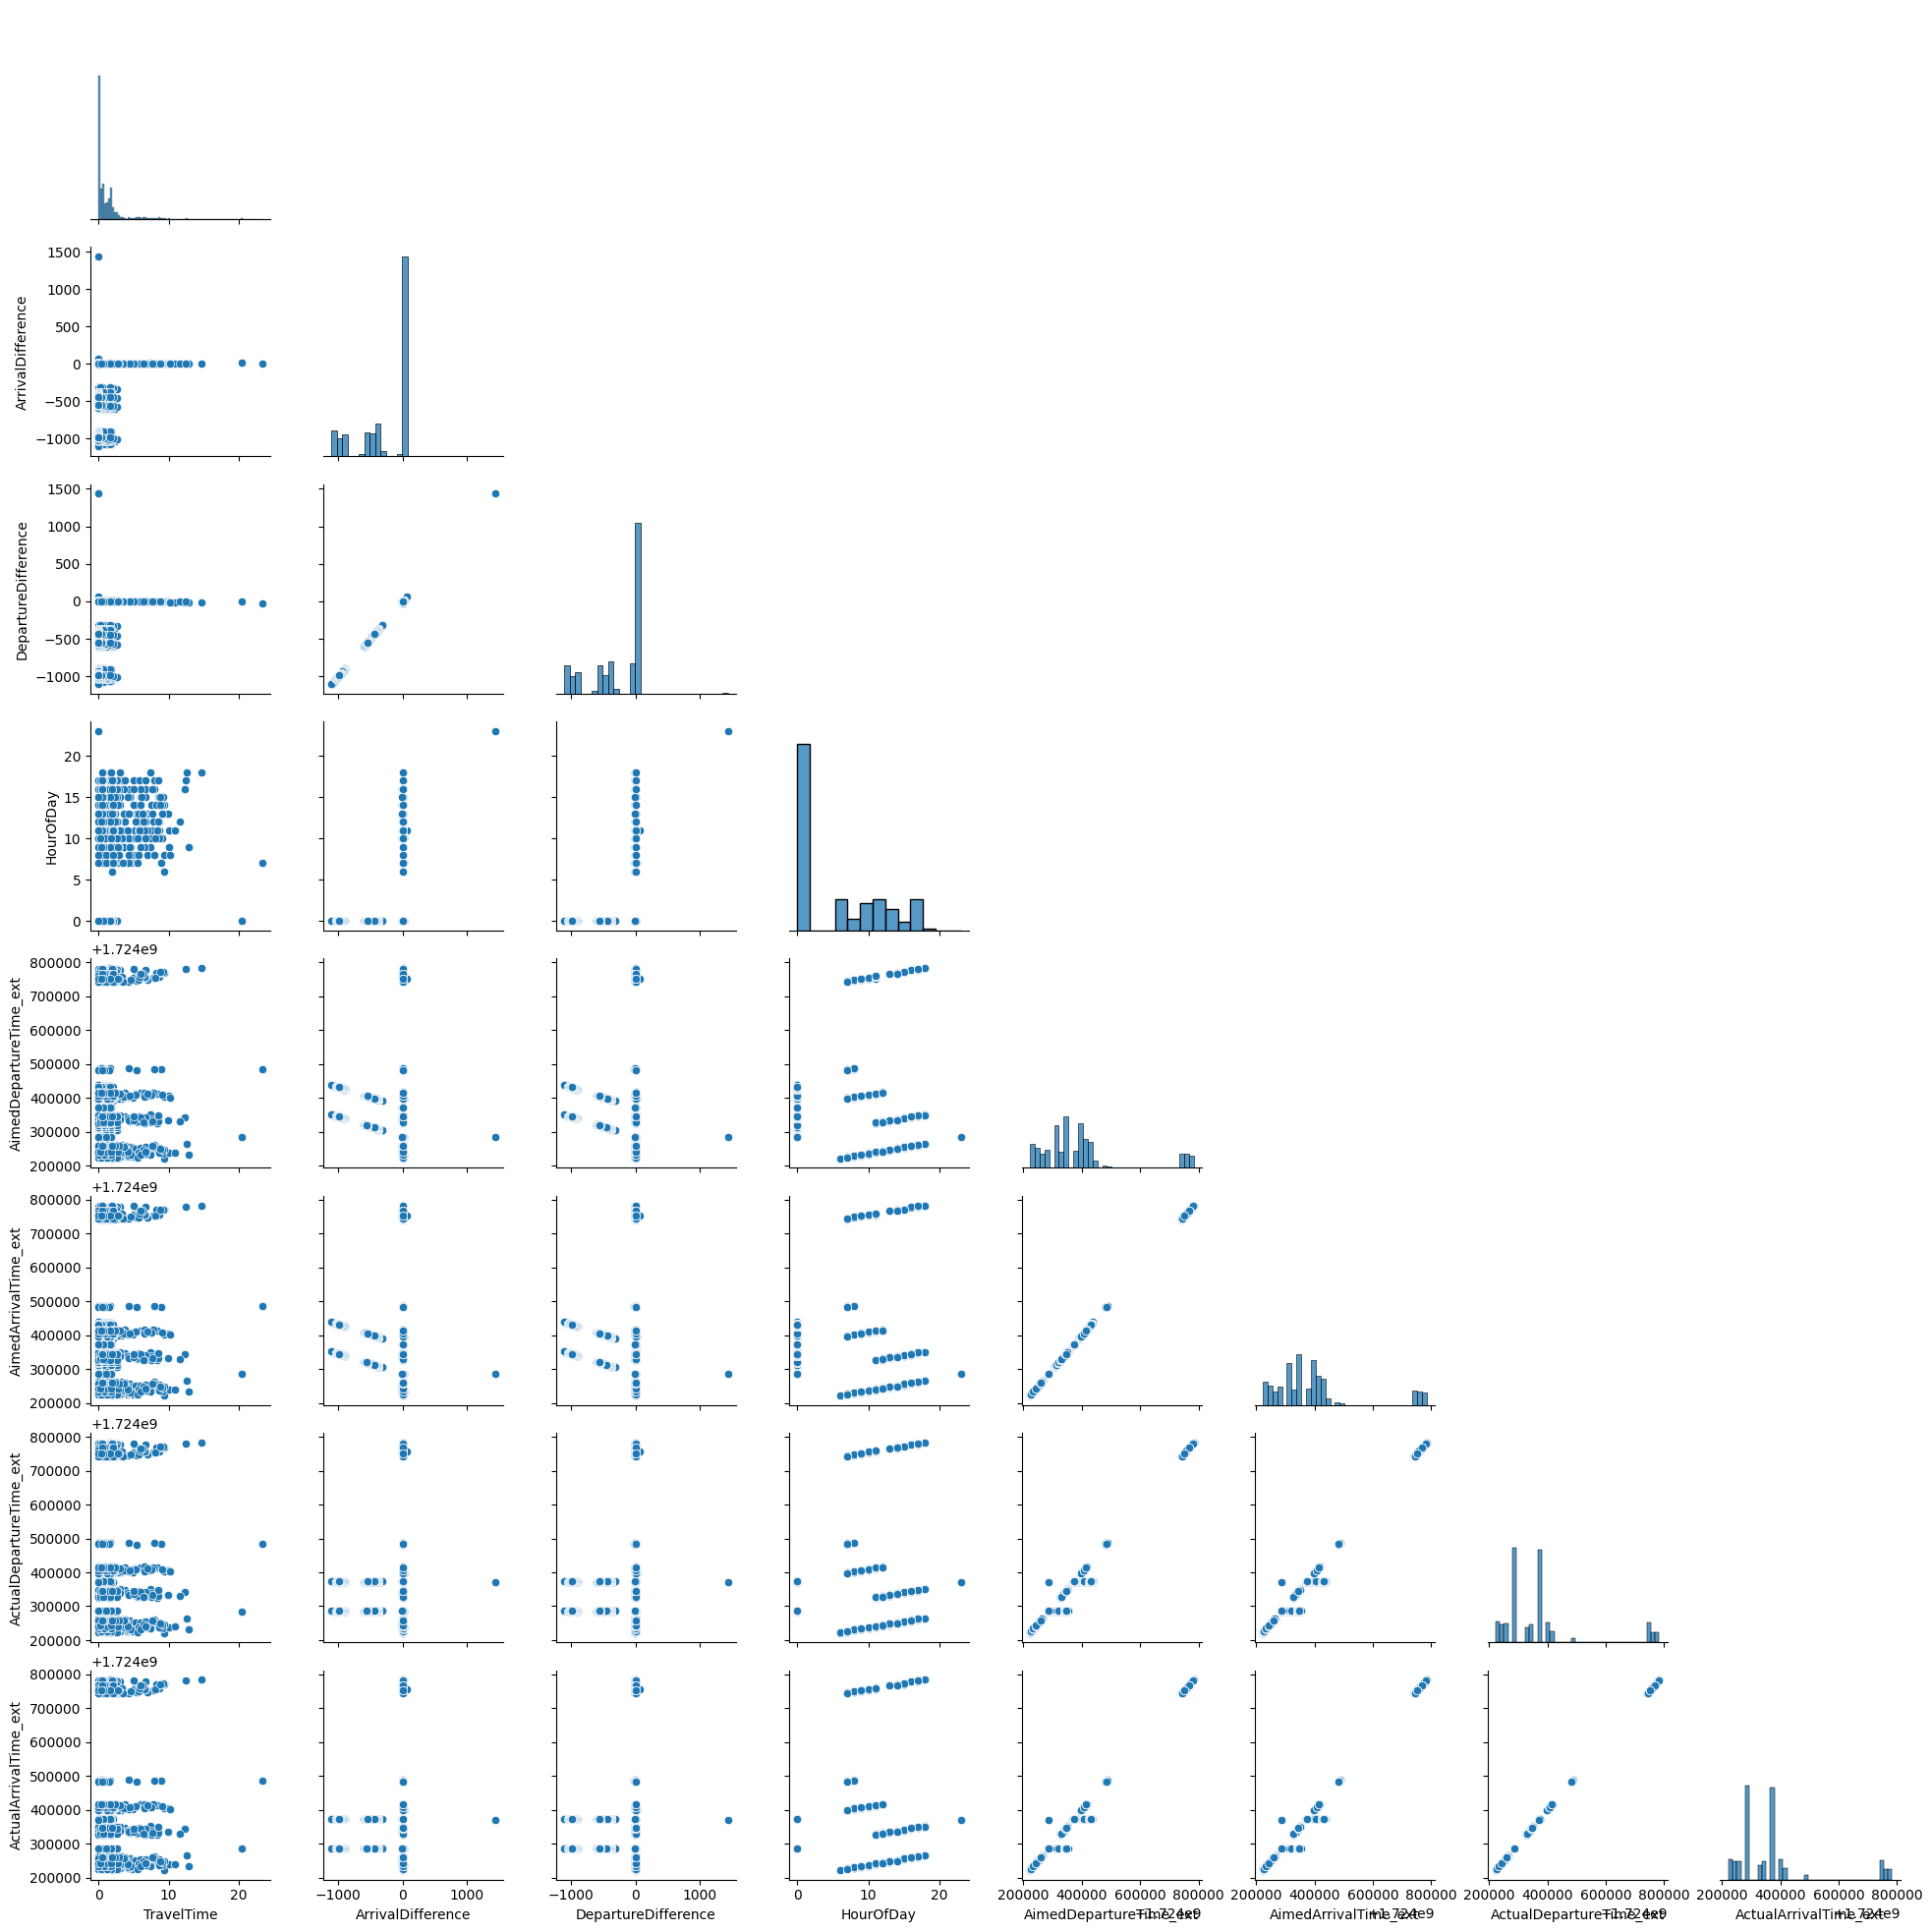

In [19]:

# Create the pairplot
sns.pairplot(df, vars=numeric_features, corner=True)

# Show the plot
plt.show()


In [20]:
df = df.drop(['AimedDepartureTime_ext', 'AimedArrivalTime_ext',
    'ActualDepartureTime_ext', 'ActualArrivalTime_ext'], axis=1)

In [21]:
df.head()

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour
0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007454,260007423,2024-08-21 06:36:00,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,1:1_1_2147483284,9.30,-0.150000,-9.450000,6,6
1,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007423,260007343,2024-08-21 06:36:00,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1:1_2_2147483283,1.85,0.700000,-0.150000,6,6
2,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007454,260007423,2024-08-21 08:56:00,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,1:1_1_2147483284,5.40,1.083333,-4.316667,8,8
3,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007423,260007343,2024-08-21 08:56:00,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,1:1_2_2147483283,2.30,2.383333,1.083333,8,8
4,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,260007454,260007423,2024-08-21 11:14:00,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,1:1_1_2147483284,0.00,-7.550000,-7.550000,11,11


In [22]:
# Identify highly correlated features

#Empty list to store correlated variable pairs
highly_corr_pairs = []


# Iterate over each column in the correlation matrix
for col in corrMat.columns:
    # Find variables with correlation greater than 0.9
    high_corr_vars = corrMat[abs(corrMat[col]) > 0.9].index.to_list()

    # If there are more than one highly correlated variables
    if len(high_corr_vars) > 1:
        # Add the pairs to the list
        for var in high_corr_vars:
            if var != col:  # to avoid adding self-correlations
                pair = (col, var)
                if pair not in highly_corr_pairs and (var, col) not in highly_corr_pairs:
                    highly_corr_pairs.append(pair)

# Print the list of highly correlated variable pairs
print("Highly correlated variable pairs:")
for pair in highly_corr_pairs:
    print(pair)

Highly correlated variable pairs:
('ArrivalDifference', 'DepartureDifference')
('AimedDepartureTime_ext', 'AimedArrivalTime_ext')
('AimedDepartureTime_ext', 'ActualDepartureTime_ext')
('AimedDepartureTime_ext', 'ActualArrivalTime_ext')
('AimedArrivalTime_ext', 'ActualDepartureTime_ext')
('AimedArrivalTime_ext', 'ActualArrivalTime_ext')
('ActualDepartureTime_ext', 'ActualArrivalTime_ext')


Mean Travel Time: 1.26
Variance of Travel Time: 4.55
Variance to Mean Ratio: 3.60


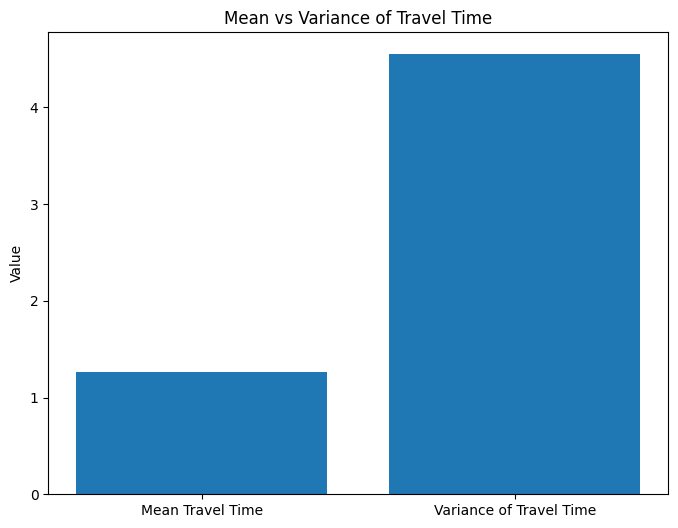

In [23]:
# Calculate the mean of TravelTime
mean_travel_time = df['TravelTime'].mean()

# Calculate the variance of TravelTime
variance_travel_time = df['TravelTime'].var()

# Print the mean and variance
print(f"Mean Travel Time: {mean_travel_time:.2f}")
print(f"Variance of Travel Time: {variance_travel_time:.2f}")

# print the ratio of variance to mean
variance_to_mean_ratio = variance_travel_time / mean_travel_time
print(f"Variance to Mean Ratio: {variance_to_mean_ratio:.2f}")

# Comparing mean and variance visually using bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Mean Travel Time', 'Variance of Travel Time'], [mean_travel_time, variance_travel_time])
plt.title('Mean vs Variance of Travel Time')
plt.ylabel('Value')
plt.show()

overdispersion is observed in the travel time, the varince is far larger than the mean.

In [24]:
df.columns

Index(['Day', 'VehicleJourneyRef', 'DestinationAimedArrivalTime',
       'JourneyCode', 'FromStopID', 'ToStopID', 'AimedDepartureTime',
       'AimedArrivalTime', 'ActualDepartureTime', 'ActualArrivalTime',
       'RouteID', 'TravelTime', 'ArrivalDifference', 'DepartureDifference',
       'HourOfDay', 'ArrivalHour'],
      dtype='object')

In [25]:
df.head()

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour
0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007454,260007423,2024-08-21 06:36:00,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,1:1_1_2147483284,9.30,-0.150000,-9.450000,6,6
1,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007423,260007343,2024-08-21 06:36:00,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1:1_2_2147483283,1.85,0.700000,-0.150000,6,6
2,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007454,260007423,2024-08-21 08:56:00,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,1:1_1_2147483284,5.40,1.083333,-4.316667,8,8
3,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007423,260007343,2024-08-21 08:56:00,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,1:1_2_2147483283,2.30,2.383333,1.083333,8,8
4,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,260007454,260007423,2024-08-21 11:14:00,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,1:1_1_2147483284,0.00,-7.550000,-7.550000,11,11


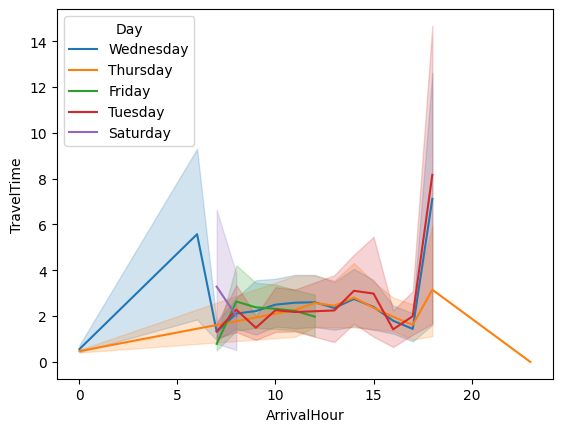

In [26]:
sns.lineplot(data=df, x= 'ArrivalHour', y = 'TravelTime', hue='Day')
plt.show()

In [27]:
print(type(df['ActualArrivalTime'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


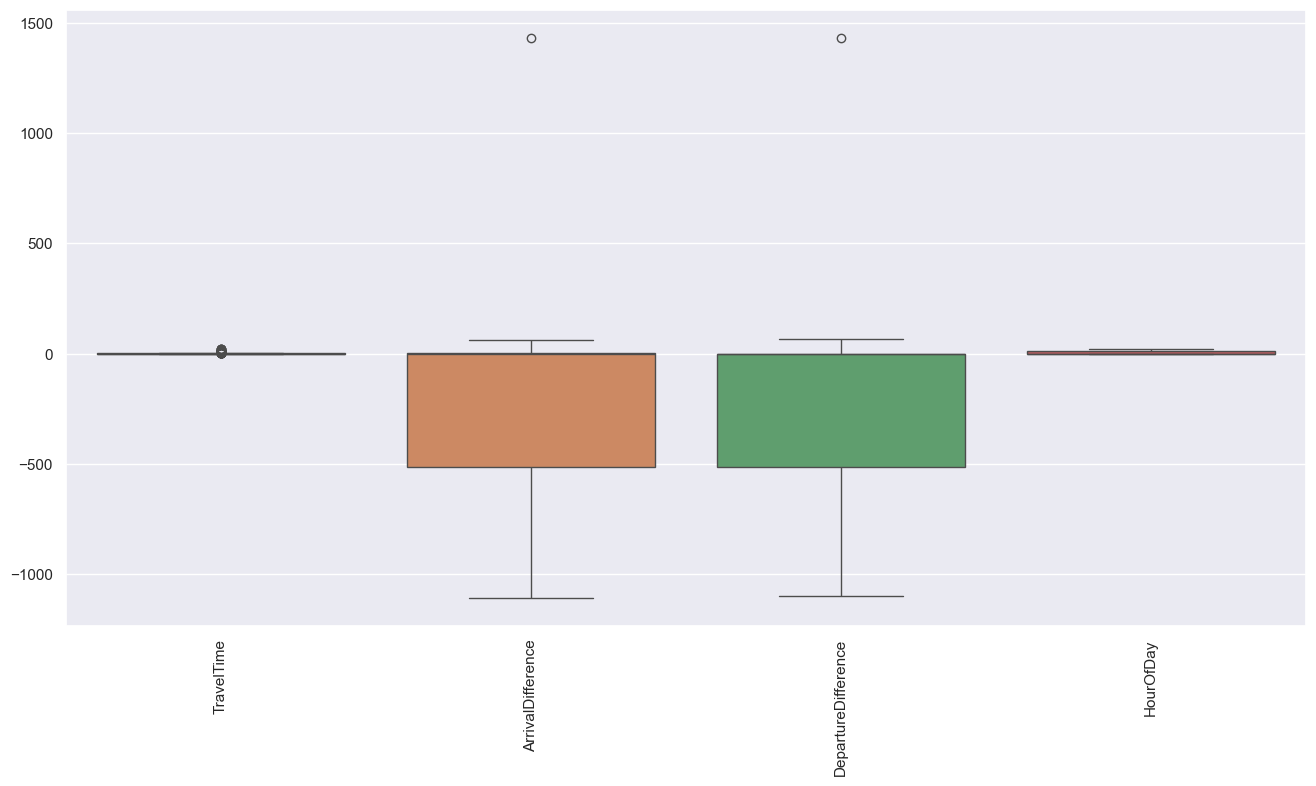

In [28]:
#Set  plot size
sns.set(rc={'figure.figsize': (16, 8)})

# Define features 
features  = [
    'TravelTime', 'ArrivalDifference', 'DepartureDifference',
    'HourOfDay', 'AimedDepartureTime', 'AimedArrivalTime',
    'ActualDepartureTime', 'ActualArrivalTime'
]  

# Create  boxplot
ax = sns.boxplot(data=df[features])

# Rotate the x-axis labels 
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

The plot evidently shows late arrival time in the schedule and and also late  departure time in the schedule with the mean travel time very close to minimum for each stop. 

In [29]:
df.head()

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour
0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007454,260007423,2024-08-21 06:36:00,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,1:1_1_2147483284,9.30,-0.150000,-9.450000,6,6
1,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007423,260007343,2024-08-21 06:36:00,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1:1_2_2147483283,1.85,0.700000,-0.150000,6,6
2,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007454,260007423,2024-08-21 08:56:00,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,1:1_1_2147483284,5.40,1.083333,-4.316667,8,8
3,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007423,260007343,2024-08-21 08:56:00,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,1:1_2_2147483283,2.30,2.383333,1.083333,8,8
4,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,260007454,260007423,2024-08-21 11:14:00,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,1:1_1_2147483284,0.00,-7.550000,-7.550000,11,11


In [30]:
df.to_csv('./df_explored.csv', index =False)